# Setup

In [1]:
from qiskit import  QuantumRegister as qr, ClassicalRegister as cr ,QuantumCircuit as qc
from qiskit.quantum_info import Operator
from qiskit_utils import DisplayCircuit, apply_dec_to_qbits
from random import randrange
import numpy as np
from qiskit.circuit.library import QFT

# Problem 1 

obviously the first circiut gives us the best result in the least iterations

## defining oracle 

In [2]:
oracle_m = np.identity(2 ** 4)
oracle_m[2,2] = -1
print(oracle_m)

iterations = 1

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. 

## a)  

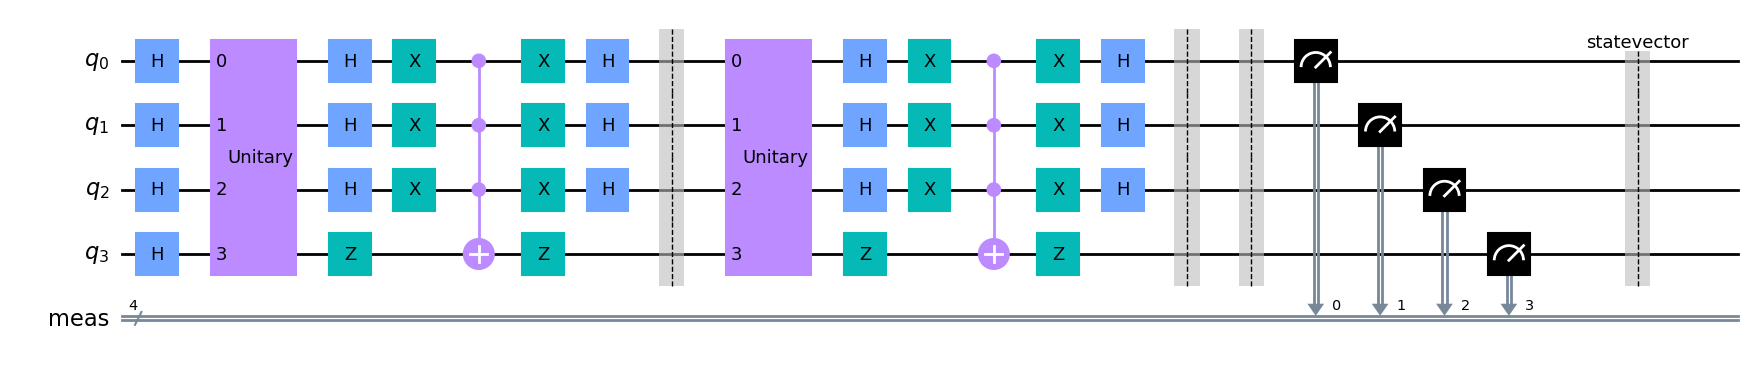

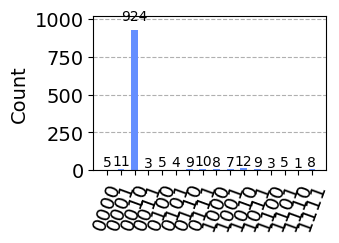

In [3]:
c = qc(4)
c.h(range(4))
for i in range(iterations * 2):
    c.unitary(Operator(oracle_m),range(4))
    c.h(range(3))
    c.x(range(3))
    c.z(3)
    c.mct(list(range(3)),3)
    c.z(3)
    c.x(range(3))
    c.h(range(3))
    c.barrier()
c.measure_all()
DisplayCircuit(c,stateVector = False, histogram = True)

## b)

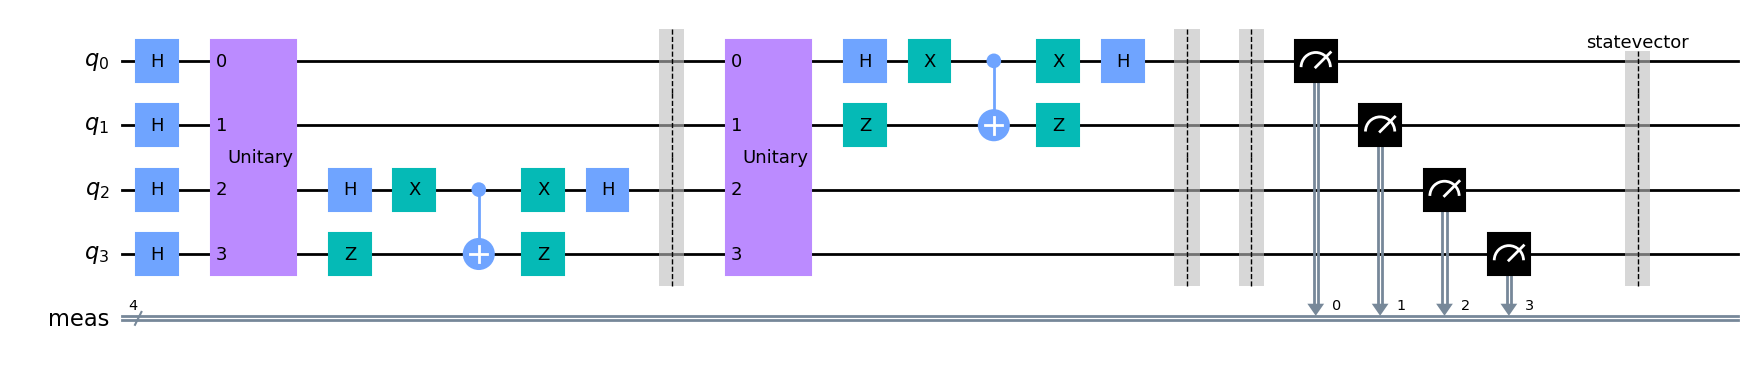

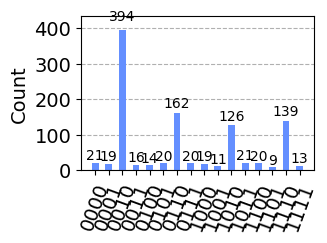

In [28]:
c = qc(4)
c.h(range(4))
for i in range(iterations * 2):
    local = ((i + 1) % 2) * 2
    c.unitary(Operator(oracle_m),range(4))
    c.h(local)
    c.x(local)
    c.z(local + 1)
    c.cnot(local, local+1)
    c.z(local + 1)
    c.x(local)
    c.h(local)
    c.barrier()
c.measure_all()
DisplayCircuit(c,stateVector = False, histogram = True)

## c) 

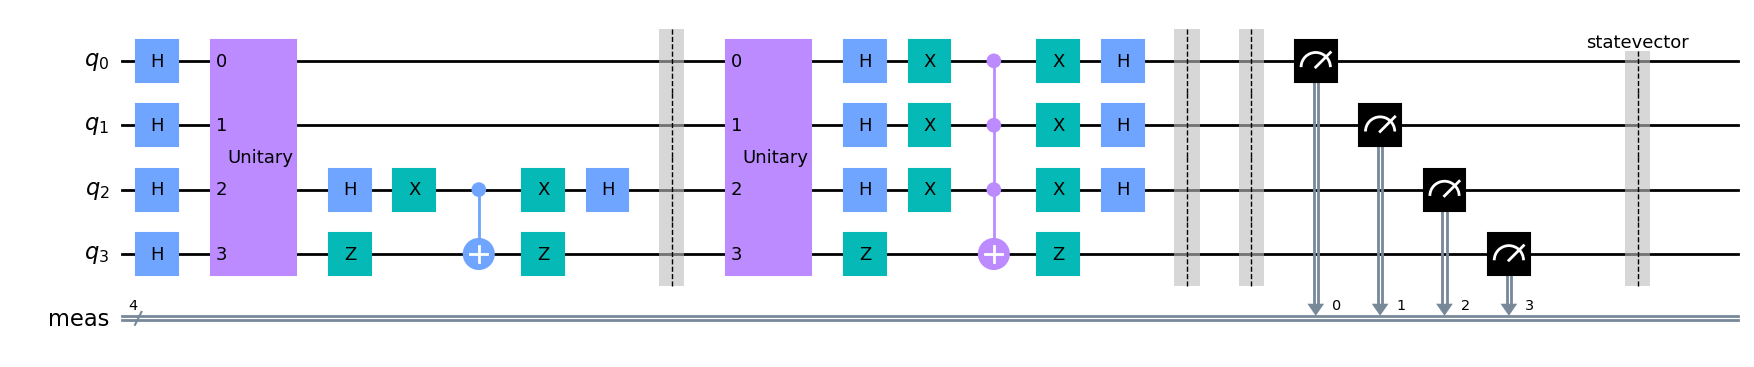

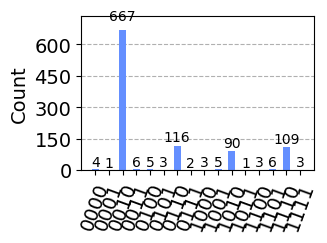

In [25]:
c = qc(4)
c.h(range(4))
for i in range(iterations):
    c.unitary(Operator(oracle_m),range(4))
    c.h(2)
    c.x(2)
    c.z(3)
    c.cnot(2, 3)
    c.z(3)
    c.x(2)
    c.h(2)
    c.barrier()
    c.unitary(Operator(oracle_m),range(4))
    c.h(range(3))
    c.x(range(3))
    c.z(3)
    c.mct(list(range(3)),3)
    c.z(3)
    c.x(range(3))
    c.h(range(3))
    c.barrier()
c.measure_all()
DisplayCircuit(c,stateVector = False, histogram = True)

# Problem 2
## QFT

In [4]:
def qft(circuit, fromBit):
    qubitCount = circuit.num_qubits
    
    if(fromBit >= qubitCount):
        return circuit
    
    circuit.h(fromBit)
    for i in range(fromBit + 1 , qubitCount):
        circuit.cp(np.pi/(2 ** (i - fromBit)), i, fromBit)
        
    circuit.barrier()
    return qft(circuit, fromBit + 1 )

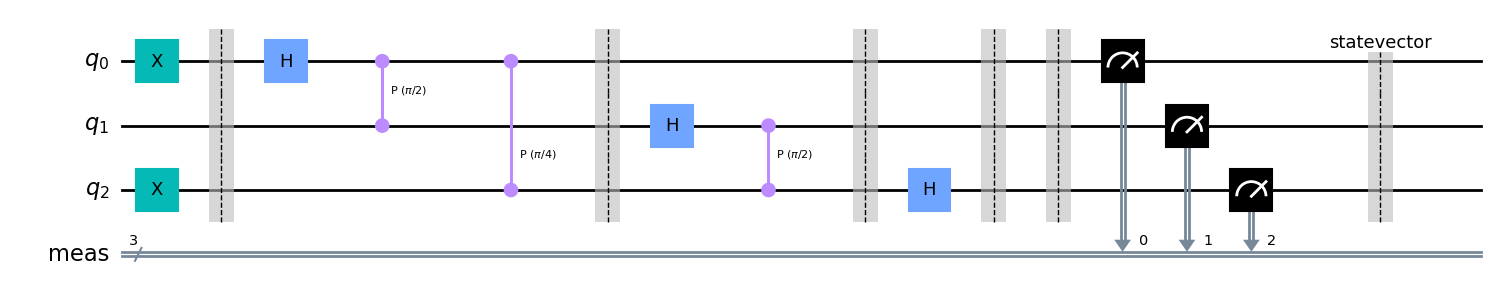

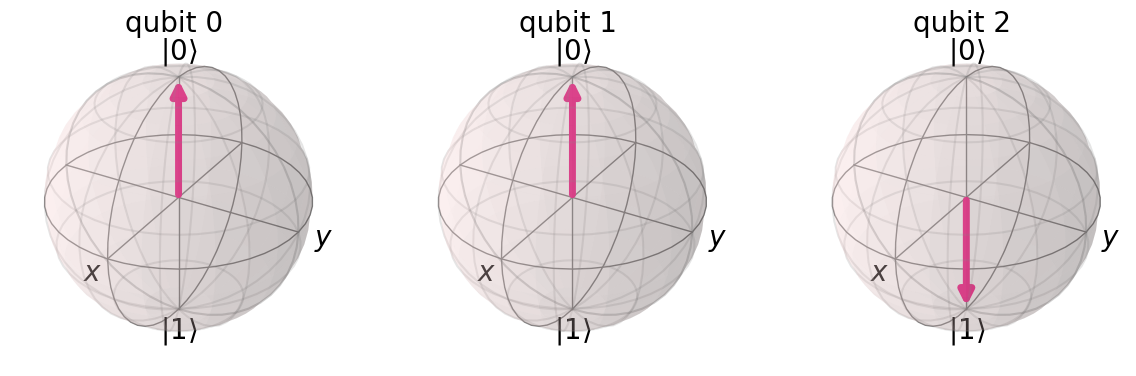

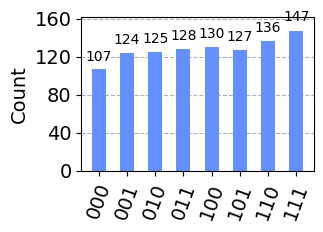

In [5]:
c = qc(3)
c = apply_dec_to_qbits(c, 5)
c = qft(c, 0)
c.measure_all()
DisplayCircuit(c,stateVector = False, bloch = True, histogram = True)

## QPE 

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Circuit circuit-924 contains invalid instructions {"gates": {IQFT_dg}} for "statevector" method.


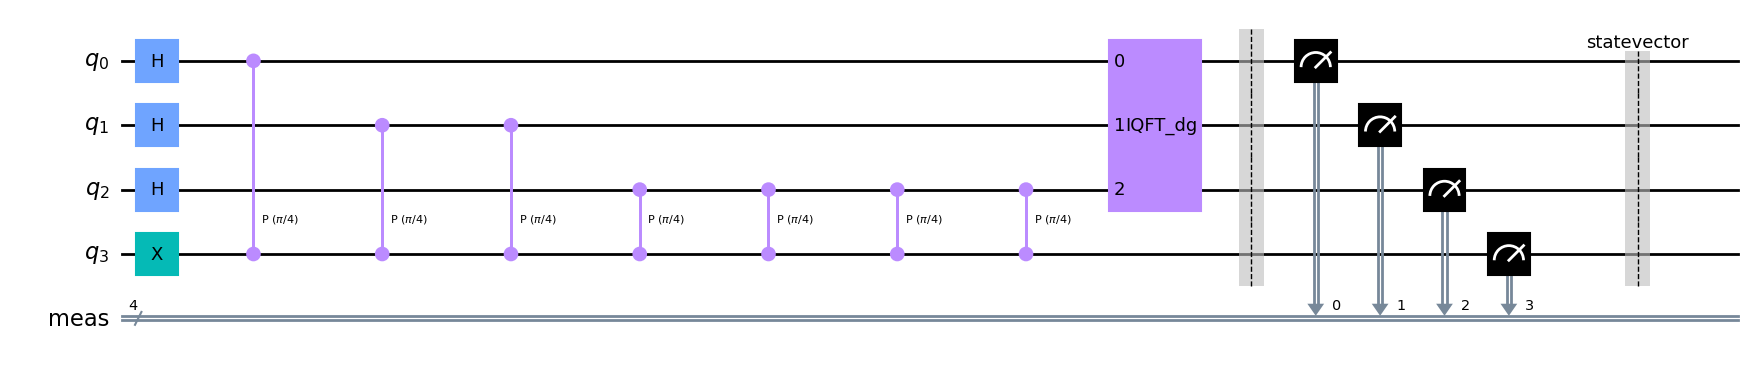

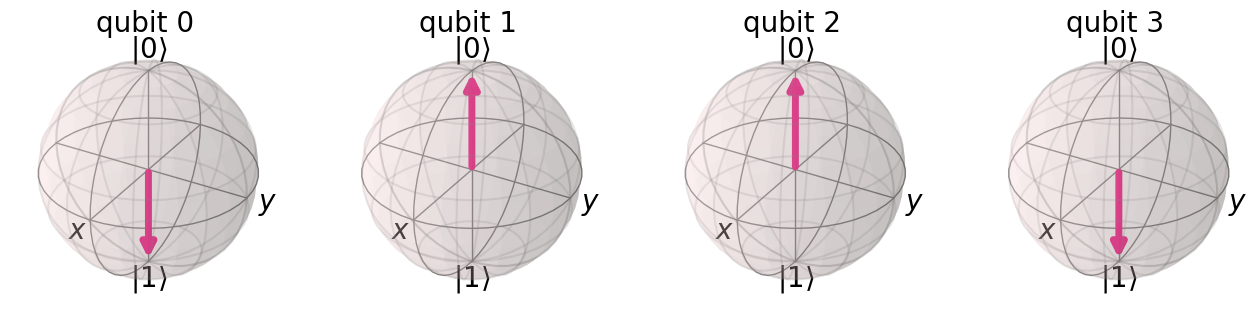

In [24]:
qubits = 4

c = qc(qubits)
# c = apply_dec_to_qbits(c, 1)

c.h(range(qubits - 1))
c.x(qubits - 1)

iteration = 1
for qbit in range(qubits - 1):
    for i in range(iteration):
        c.cp(np.pi / 4, qbit, qubits - 1)
    iteration *= 2
    
c = c.compose(QFT(qubits - 1, inverse = True),list(range(qubits - 1)))

c.measure_all()

# c.draw()
DisplayCircuit(c ,stateVector = False, bloch = True)

# Problem 3

|1011> = dec( 11 )

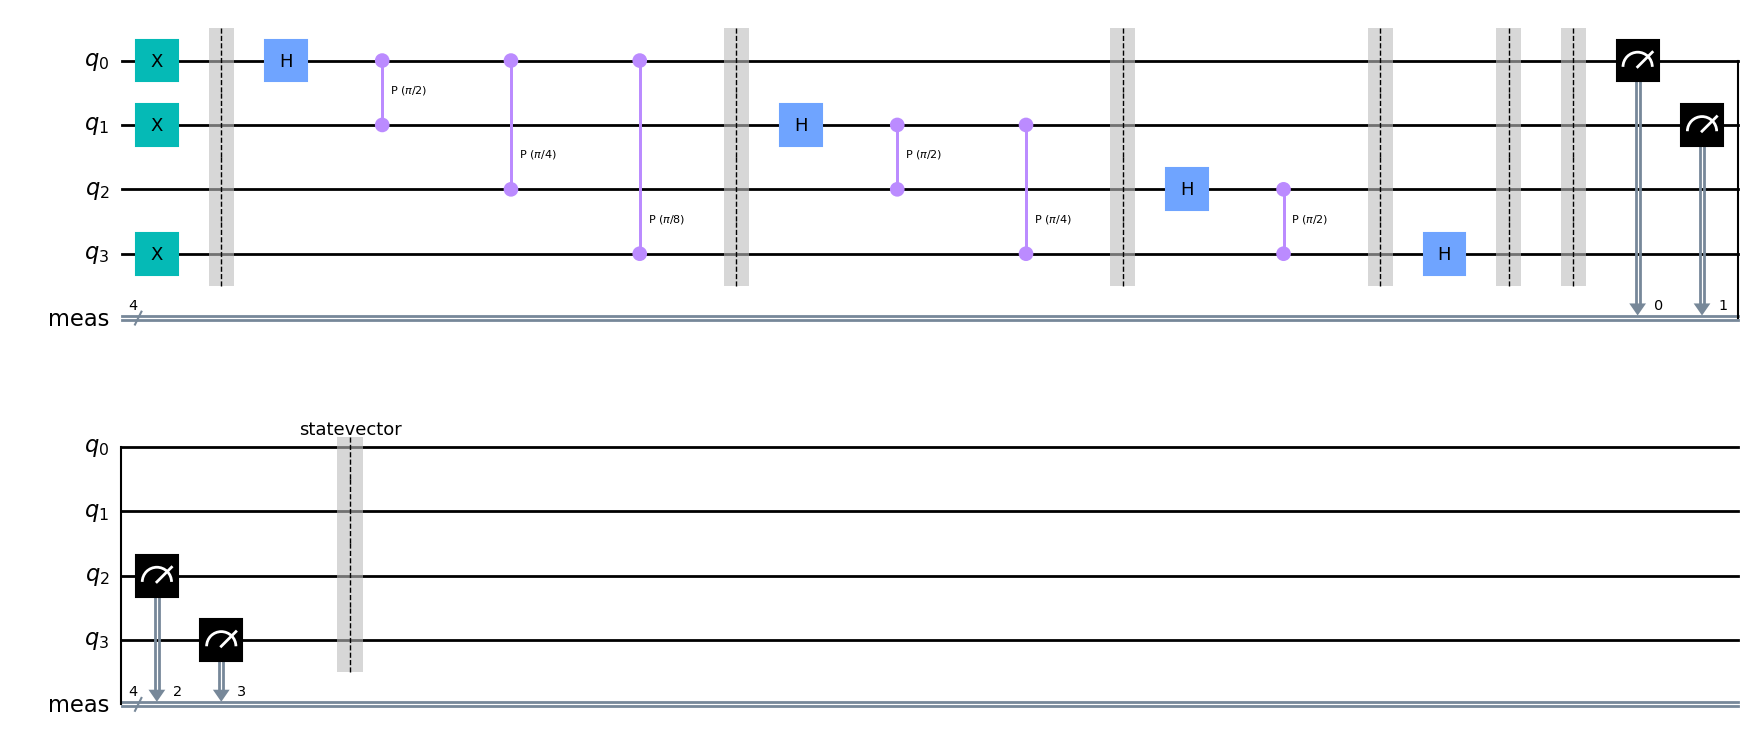

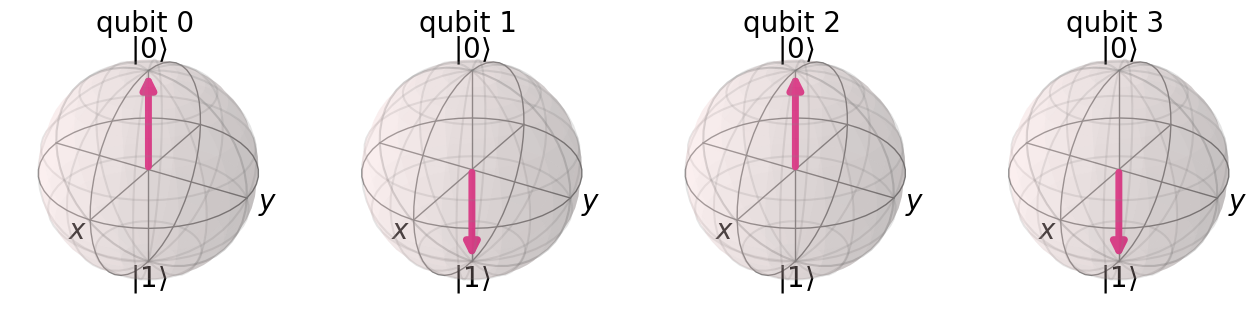

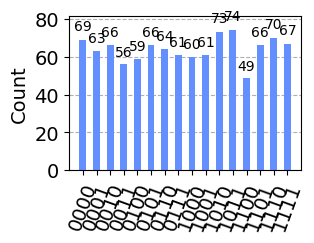

In [14]:
c = qc(4)
c = apply_dec_to_qbits(c, 11)
c = qft(c, 0)
c.measure_all()
DisplayCircuit(c,stateVector = False, bloch = True, histogram = True)

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Circuit circuit-787 contains invalid instructions {"gates": {QFT}} for "statevector" method.


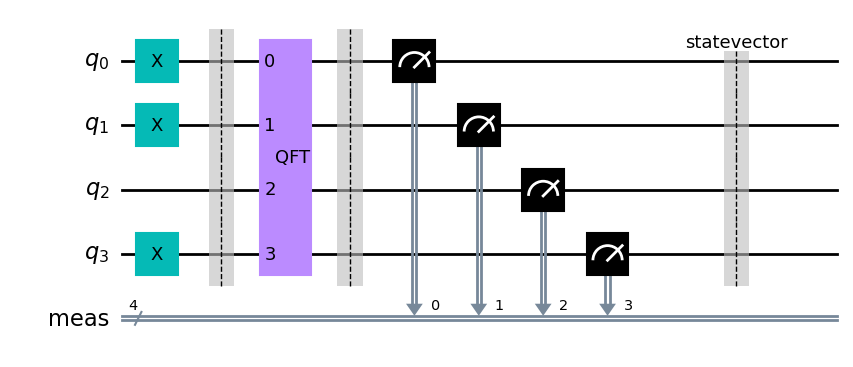

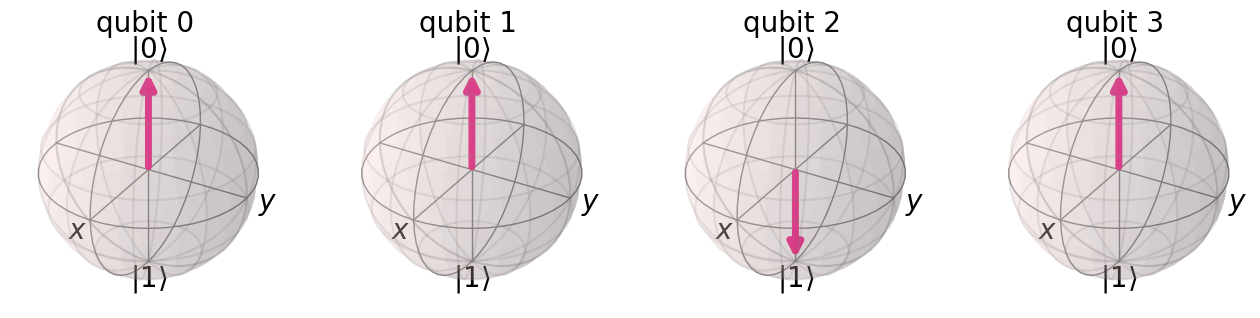

In [18]:
c = qc(4)
c = apply_dec_to_qbits(c, 11)
c = c.compose(QFT(4, ), range(4))
c.measure_all()

DisplayCircuit(c,stateVector = False, bloch = True)


# Problem 4

consider the circuit in problem2-QPE.
1- first reRun the problem2-QPE part to load the circuit in memory.
2- now run this section

we recive the result |1>|001> with probability of One , which means 

Theta = 1/2^3 = 1/8



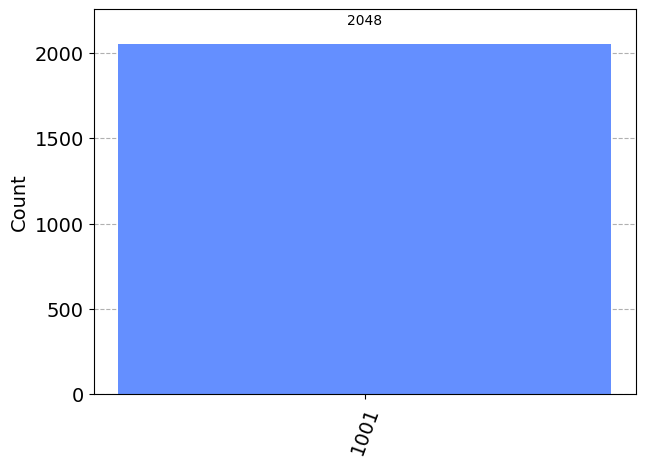

In [28]:
from qiskit import  Aer,transpile,assemble
from qiskit.visualization import plot_histogram

aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(c, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)